In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/37be2146-0a9a-4876-aef9-89a771363418/37be2146-0a9a-4876-aef9-89a771363418')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*application_data.txt'):
        all_filenames.append(f.name)
        
# Open and load the file  
for f in list(set(all_filenames)):
    app_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["application_data"] 
            temp_df = pd.DataFrame(data)
            app_data = app_data.append(temp_df,ignore_index=True)   

In [4]:
app_data

,name,time,timeDate
0,com.android.settings,1436987919281117,13.08.2019 17:05:22.441
1,ch.ethz.inf.vs.staals.visualattentionrecorder,1436994121783927,13.08.2019 17:05:28.644
2,com.android.settings,1436995160568041,13.08.2019 17:05:29.683
3,ch.ethz.inf.vs.staals.visualattentionrecorder,1437015455660846,13.08.2019 17:05:49.978
4,com.android.vending,1437173419387817,13.08.2019 17:08:27.941
...,...,...,...
1359,com.miui.home,1690564761463465,16.08.2019 15:31:39.684
1360,com.whatsapp,1690566902199870,16.08.2019 15:31:41.825
1361,com.miui.home,1690568540838880,16.08.2019 15:31:43.463
1362,com.miui.home,1690958882800339,16.08.2019 15:38:13.805


In [15]:
# Sort the values by timeDate
app_data = app_data.sort_values(by=['timeDate'],ignore_index=True)

print(app_data.name.describe())

app_data

count              1364
unique               24
top       com.miui.home
freq                767
Name: name, dtype: object


,name,time,timeDate
0,com.android.settings,1436987919281117,13.08.2019 17:05:22.441
1,ch.ethz.inf.vs.staals.visualattentionrecorder,1436994121783927,13.08.2019 17:05:28.644
2,com.android.settings,1436995160568041,13.08.2019 17:05:29.683
3,ch.ethz.inf.vs.staals.visualattentionrecorder,1437015455660846,13.08.2019 17:05:49.978
4,com.android.vending,1437173419387817,13.08.2019 17:08:27.941
...,...,...,...
1359,com.miui.home,2818787282546452,29.08.2019 16:55:21.814
1360,com.whatsapp,2818787795331504,29.08.2019 16:55:22.327
1361,com.miui.home,2818796075400199,29.08.2019 16:55:30.607
1362,com.miui.home,2819024401032504,29.08.2019 16:59:18.933


In [17]:
# Exclude attention recorder app
mask = app_data['name'].isin(['ch.ethz.inf.vs.staals.visualattentionrecorder','com.miui.home'])
app_data_m = app_data[~mask]
app_data_m.name.describe()

count              499
unique              22
top       com.whatsapp
freq               227
Name: name, dtype: object

In [18]:
# Export dataframe to csv file 
app_data_m.to_csv(r'/shome/ws2021/group9/dataset/3418app_data_m.csv',index=False)

In [11]:
app_counts = app_data_m.name.value_counts()
app_counts

com.whatsapp                               227
com.supercell.clashroyale                  151
com.android.chrome                          23
com.google.android.gm                       19
com.android.settings                        18
com.google.android.youtube                  15
com.android.deskclock                        9
com.google.android.apps.maps                 8
com.ubs.swidK2Y.android                      5
com.android.vending                          3
com.android.systemui                         3
com.android.mms                              2
com.google.android.googlequicksearchbox      2
com.android.browser                          2
com.android.incallui                         2
android                                      2
com.android.contacts                         2
com.android.htmlviewer                       2
com.google.android.packageinstaller          1
org.telegram.messenger                       1
com.miui.global.packageinstaller             1
com.miui.gall

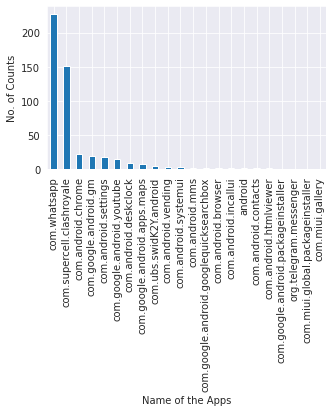

In [19]:
app_counts.plot(kind='bar',xlabel='Name of the Apps', ylabel='No. of Counts',figsize=(5, 3))
plt.savefig('Frequency of the apps_3418.jpg',dpi=600,bbox_inches ='tight')
plt.show()

In [12]:
app_1 = app_counts.loc[app_counts==1]
print("The no. of apps which are used once:",sum(app_1))

The no. of apps which are used once: 4


Notifications Data

In [20]:
from pathlib import Path

# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/37be2146-0a9a-4876-aef9-89a771363418/37be2146-0a9a-4876-aef9-89a771363418')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*notification_data.txt'):
        all_filenames.append(f.name)
# Open and load the file  
for f in list(set(all_filenames)):
    noti_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["notification_data"] 
            temp_df = pd.DataFrame(data)
            noti_data = noti_data.append(temp_df,ignore_index=True)           

In [21]:
# Sort the values by timeDate
noti_data = noti_data.sort_values(by=['timeDate'],ignore_index=True)

In [ ]:
# Notification_data
noti_data

In [23]:
# Exclude the notification data from android launcher, and attention recorder app
mask = noti_data['package'].isin([ 'ch.ethz.inf.vs.staals.visualattentionrecorder'])
noti_data_m = noti_data[~mask]

In [24]:
# Information about package column
noti_data_m.package.describe()

count              581
unique              11
top       com.whatsapp
freq               382
Name: package, dtype: object

In [25]:
noti_counts= noti_data_m.package.value_counts()

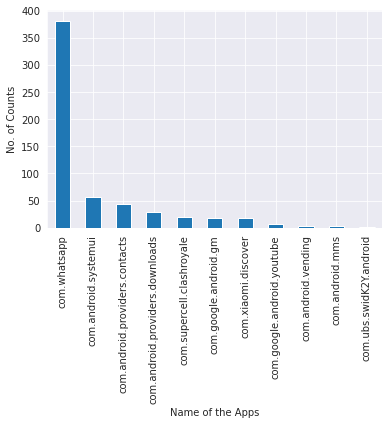

In [26]:
noti_counts.plot(kind='bar',xlabel='Name of the Apps', ylabel='No. of Counts',figsize=(6, 4))
#plt.savefig('Notifications_7711.jpg',dpi=600,bbox_inches ='tight')
plt.show()